* Escolha um problema de regressão de sua preferência (você pode procurar no Kaggle, sklearn.datasets, UCI Repository, usar algum relacionado a seu trabalho, etc.) e reproduza os procedimentos apresentados na aula:
* Comparação em diagrama de caixa entre vários modelos, utilizando validação cruzada;
* Traçado de curvas de aprendizado para os vários modelos;
* Traçado de curvas de validação para hiperparâmetro(s) selecionado(s).
* Dica: por conta da natureza do problema (regressão e não mais classificação), você precisará utilizar outros modelos e métricas de avaliação.

* Automatize alguma das explorações de hiperparâmetros que você efetuou nas aulas passadas (florestas aleatórias da Aula 1 ou redes neurais da Aula 3).

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from optuna import create_study
from optuna import visualization
import numpy as np
import sklearn
sns.set()

# Validação Cruzada

In [2]:
data = pd.read_csv('../input/bostonhoustingmlnd/housing.csv')
X, y = data.iloc[:, :-1], data.iloc[:, -1]
X = (X - X.mean())/(X.std()) # normalização
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## Comparação em diagrama de caixa entre vários modelos, utilizando validação cruzada

Modelo: média, desvio-padrão
-------------------
RandomForestRegressor: 0.808, 0.0552
DecisionTreeRegressor: 0.658, 0.142
LinearRegression: 0.68, 0.0965
KNeighborsRegressor: 0.815, 0.0647


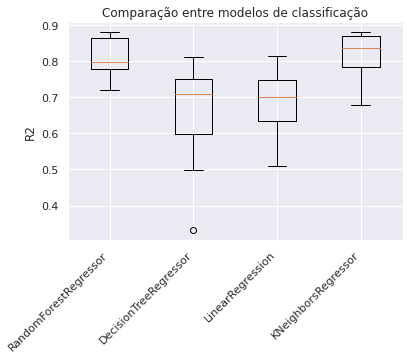

In [3]:
# especificando modelos 

modelos = [
    
     RandomForestRegressor(),
     DecisionTreeRegressor(),
     LinearRegression(),
     KNeighborsRegressor()  
    
]

#lista para guardar resultados
results = [0]*len(modelos)

print('Modelo: média, desvio-padrão\n-------------------')

for i in range(len(modelos)):
    
    # efetuando a validação cruzada!
    results[i] = sklearn.model_selection.cross_val_score(modelos[i], 
                                                         X_train, y_train, 
                                                         cv=10, 
                                                         scoring='r2',
                                                         n_jobs=-1)
    
    # imprimindo resultados
    print(f'{modelos[i].__class__.__name__}: {results[i].mean():.3}, {results[i].std():.3}')

# plotando resultados
fig, ax = plt.subplots()
ax.boxplot(results)

# formatando gráfico
ax.set_xticklabels([modelos[i].__class__.__name__ for i in range(len(modelos))], 
                   rotation = 45, ha="right")
ax.set_ylabel("R2")
ax.set_title('Comparação entre modelos de classificação');

Os modelos que apresentaram melhores resultados foram random forest e K nearests neighbors.

## Traçado de curvas de aprendizado para os vários modelos

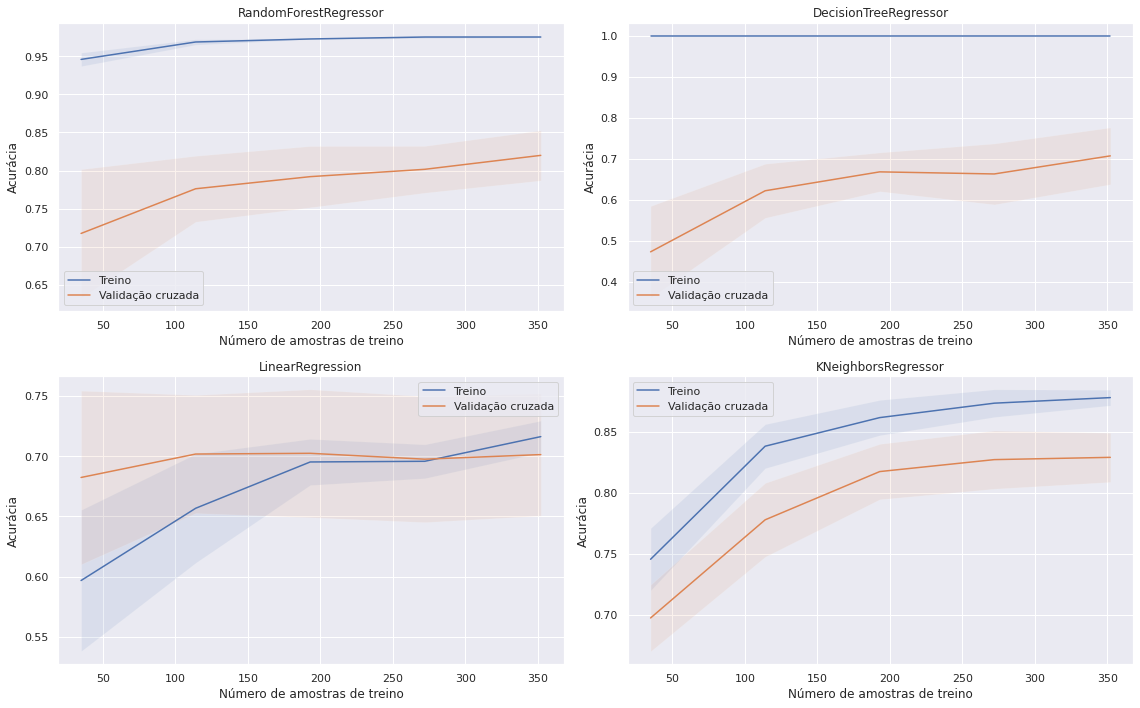

In [4]:
# adaptado de https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

# especificando modelos 

modelos = [
    
     RandomForestRegressor(),
     DecisionTreeRegressor(),
     LinearRegression(),
     KNeighborsRegressor()  
    
]

fig, ax = plt.subplots(2,2,figsize=(16,10))

for i in range(len(modelos)):
    
    # calculando a curva de aprendizado!
    train_sizes, train_scores, test_scores = sklearn.model_selection.learning_curve(modelos[i], 
                                                                                    X_train, y_train, 
                                                                                    cv=5, 
                                                                                    scoring='r2',
                                                                                    n_jobs=-1)
    
    # médias e desvios-padrão dos resultados da validação cruzada (para cada ponto da curva)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # plotando curva correspondente ao treino
    ax.ravel()[i].plot(train_sizes, train_scores_mean, label="Treino")
    ax.ravel()[i].fill_between(train_sizes, train_scores_mean - train_scores_std,
                               train_scores_mean + train_scores_std, alpha=0.1)
    
    # plotando curva correspondente ao teste
    ax.ravel()[i].plot(train_sizes, test_scores_mean, label="Validação cruzada")
    ax.ravel()[i].fill_between(train_sizes, test_scores_mean - test_scores_std,
                               test_scores_mean + test_scores_std, alpha=0.1)
    
    # formatando gráfico
    ax.ravel()[i].set_title(modelos[i].__class__.__name__)
    ax.ravel()[i].set_ylabel('Acurácia')
    ax.ravel()[i].set_xlabel('Número de amostras de treino')
    ax.ravel()[i].legend(loc="best")
    

fig.tight_layout();

O modelo de arvore de decisão e floresta de decisão como esperado apresetam alto sobre ajuste, já os modelos de regressão Linear e KNN não tanta.

## Traçado de curvas de validação para hiperparâmetro(s) selecionado(s).

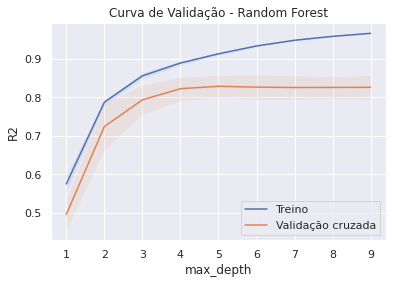

In [5]:
# adaptado de https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html

# definindo os valores de parâmetros a serem testados
param_range = list(range(1,10))

# definindo o modelo
m = RandomForestRegressor()

# calculando a curva de validação!
train_scores, test_scores = sklearn.model_selection.validation_curve(m, X_train, y_train, 
                                                                     param_name="max_depth", 
                                                                     param_range=param_range,
                                                                     scoring="r2", 
                                                                     n_jobs=-1)

# médias e desvios-padrão dos resultados da validação cruzada (para cada ponto da curva)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# plotando curva correspondente ao treino
plt.plot(param_range, train_scores_mean, label="Treino")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)

# plotando curva correspondente ao teste
plt.plot(param_range, test_scores_mean, label="Validação cruzada")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)

# formatando gráfico
plt.title("Curva de Validação - Random Forest")
plt.xlabel('max_depth')
plt.ylabel("R2")
plt.legend(loc="best");

Depois de 4 níveis de profundidade o modelo para de ter melhora e começa a sobre ajustar somente

# Automatização da exploração de hiper parâmetros

In [6]:
def objetivo(trial):

    classifier_name = trial.suggest_categorical("classifier", ["KNeighborsRegressor", "RandomForest"])
    
    if classifier_name == 'KNeighborsRegressor':
        knn_n = trial.suggest_int('knn_n', 3, 20)
        knn_weights = trial.suggest_categorical("knn_weights", ['uniform', 'distance'])
        knn_algorithm = trial.suggest_categorical('knn_algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
        
        m = KNeighborsRegressor(n_neighbors=knn_n, weights=knn_weights, algorithm=knn_algorithm, n_jobs=-1)

        
    else:
        rf_n_trees = trial.suggest_int('rf_n_trees', 1, 300)
        rf_criterion = trial.suggest_categorical("criterion", ['mse', 'mae'])
        rf_max_depth = trial.suggest_int('rf_max_depth', 2, 10)
        rf_min_samples_split = trial.suggest_int('rf_min_samples_split', 2, 10)
        rf_min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 3)
        rf_max_features = trial.suggest_categorical('rf_max_features',[1, 2, 3])
        
        m = RandomForestRegressor(n_estimators=rf_n_trees, criterion=rf_criterion, max_depth=rf_max_depth,
                                  min_samples_split=rf_min_samples_split, min_samples_leaf=rf_min_samples_leaf,
                                  max_features=rf_max_features)
    # retornando r2
    acuracias = sklearn.model_selection.cross_val_score(m, X_train, y_train, n_jobs = -1, cv = 3)
    acuracia = acuracias.mean()
    return acuracia

In [7]:
study = create_study(direction="maximize")
study.optimize(objetivo, n_trials = 100)

[I 2020-11-07 16:09:35,241] A new study created in memory with name: no-name-27b42b74-321e-4ee9-baf1-c033fd729fcb
[I 2020-11-07 16:09:35,303] Trial 0 finished with value: 0.8216806844934514 and parameters: {'classifier': 'RandomForest', 'rf_n_trees': 12, 'criterion': 'mse', 'rf_max_depth': 5, 'rf_min_samples_split': 3, 'min_samples_leaf': 2, 'rf_max_features': 1}. Best is trial 0 with value: 0.8216806844934514.
[I 2020-11-07 16:09:35,333] Trial 1 finished with value: 0.6926395969840139 and parameters: {'classifier': 'RandomForest', 'rf_n_trees': 1, 'criterion': 'mse', 'rf_max_depth': 8, 'rf_min_samples_split': 3, 'min_samples_leaf': 1, 'rf_max_features': 1}. Best is trial 0 with value: 0.8216806844934514.
[I 2020-11-07 16:09:35,462] Trial 2 finished with value: 0.8230740319185895 and parameters: {'classifier': 'KNeighborsRegressor', 'knn_n': 11, 'knn_weights': 'uniform', 'knn_algorithm': 'kd_tree'}. Best is trial 2 with value: 0.8230740319185895.
[I 2020-11-07 16:09:35,592] Trial 3 fin

In [8]:
study.best_params

{'classifier': 'RandomForest',
 'rf_n_trees': 164,
 'criterion': 'mae',
 'rf_max_depth': 6,
 'rf_min_samples_split': 6,
 'min_samples_leaf': 1,
 'rf_max_features': 2}

In [9]:
visualization.plot_optimization_history(study)